## Pokemon DB :

Download the "pokedex.sqlite" db from : https://www.dropbox.com/s/dhcz0ryqoxeqqrf/pokedex.sqlite?dl=0

Try to explore and see what is in the DB:

In [152]:
import sqlite3
import operator
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [153]:
con = sqlite3.connect("./data/pokedex.sqlite")
cur = con.cursor()

In [154]:
# Use this command below to see the list of tables in the DB
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
cur.fetchall()

[('conquest_move_displacements',),
 ('encounter_methods',),
 ('move_targets',),
 ('berry_firmness',),
 ('pokemon_move_methods',),
 ('conquest_warrior_stats',),
 ('item_flags',),
 ('item_fling_effects',),
 ('item_pockets',),
 ('move_damage_classes',),
 ('evolution_triggers',),
 ('contest_effects',),
 ('pokemon_habitats',),
 ('genders',),
 ('super_contest_effects',),
 ('conquest_move_ranges',),
 ('move_meta_categories',),
 ('egg_groups',),
 ('conquest_episodes',),
 ('contest_types',),
 ('move_flags',),
 ('conquest_warrior_archetypes',),
 ('conquest_stats',),
 ('encounter_conditions',),
 ('pokemon_colors',),
 ('move_battle_styles',),
 ('pal_park_areas',),
 ('move_effects',),
 ('regions',),
 ('conquest_move_effects',),
 ('growth_rates',),
 ('languages',),
 ('pokeathlon_stats',),
 ('conquest_warrior_skills',),
 ('pokemon_shapes',),
 ('move_meta_ailments',),
 ('stats',),
 ('conquest_warrior_skill_names',),
 ('conquest_move_displacement_prose',),
 ('pokemon_color_names',),
 ('encounter_condit

### Types :

In [155]:
# Write a query to output the type_id, name for different type of Pokemon and only when the language is English.
query = """
  SELECT type_id, name
  FROM (SELECT * FROM type_names ORDER BY type_id DESC)
  GROUP BY type_id;
"""
cur.execute(query)
cur.fetchall()

[(1, 'Normal'),
 (2, 'Fighting'),
 (3, 'Flying'),
 (4, 'Poison'),
 (5, 'Ground'),
 (6, 'Rock'),
 (7, 'Bug'),
 (8, 'Ghost'),
 (9, 'Steel'),
 (10, 'Fire'),
 (11, 'Water'),
 (12, 'Grass'),
 (13, 'Electric'),
 (14, 'Psychic'),
 (15, 'Ice'),
 (16, 'Dragon'),
 (17, 'Dark'),
 (10001, '???'),
 (10002, 'Shadow')]

### Gen 1 moves :

In [156]:
# Write a query to output the type_id, name for different type of Pokemon and only when the language is English.
query = """
  SELECT move_id, name
  FROM move_names
  WHERE move_names.local_language_id = 9
"""
cur.execute(query)
cur.fetchall()

[(1, 'Pound'),
 (2, 'Karate Chop'),
 (3, 'DoubleSlap'),
 (4, 'Comet Punch'),
 (5, 'Mega Punch'),
 (6, 'Pay Day'),
 (7, 'Fire Punch'),
 (8, 'Ice Punch'),
 (9, 'ThunderPunch'),
 (10, 'Scratch'),
 (11, 'ViceGrip'),
 (12, 'Guillotine'),
 (13, 'Razor Wind'),
 (14, 'Swords Dance'),
 (15, 'Cut'),
 (16, 'Gust'),
 (17, 'Wing Attack'),
 (18, 'Whirlwind'),
 (19, 'Fly'),
 (20, 'Bind'),
 (21, 'Slam'),
 (22, 'Vine Whip'),
 (23, 'Stomp'),
 (24, 'Double Kick'),
 (25, 'Mega Kick'),
 (26, 'Jump Kick'),
 (27, 'Rolling Kick'),
 (28, 'Sand-Attack'),
 (29, 'Headbutt'),
 (30, 'Horn Attack'),
 (31, 'Fury Attack'),
 (32, 'Horn Drill'),
 (33, 'Tackle'),
 (34, 'Body Slam'),
 (35, 'Wrap'),
 (36, 'Take Down'),
 (37, 'Thrash'),
 (38, 'Double-Edge'),
 (39, 'Tail Whip'),
 (40, 'Poison Sting'),
 (41, 'Twineedle'),
 (42, 'Pin Missile'),
 (43, 'Leer'),
 (44, 'Bite'),
 (45, 'Growl'),
 (46, 'Roar'),
 (47, 'Sing'),
 (48, 'Supersonic'),
 (49, 'SonicBoom'),
 (50, 'Disable'),
 (51, 'Acid'),
 (52, 'Ember'),
 (53, 'Flamethrower

In [157]:
# Write a query to output the name of the move and name of the type for Generation 1 Pokemon. 
#You wanna look into move_names,moves and type_names tables

#See column names:
#cur.execute("""SELECT * FROM type_names;""")
#cur.description

#Inspect data.
#cur.execute(""" SELECT * FROM type_names;""")
#cur.execute(""" SELECT * FROM move_names;""")
#cur.execute(""" SELECT * FROM moves;""")
#cur.fetchall()

#If exist, drop the tables we are trying to create.
cur.execute("""DROP TABLE IF EXISTS moves_gen1;""")

query = """
  CREATE TABLE IF NOT EXISTS moves_gen1 AS
  SELECT move_names_clean.name, moves.type_id
  FROM (SELECT * FROM move_names WHERE local_language_id=9) AS move_names_clean INNER JOIN moves
  ON move_names_clean.move_id = moves.id;
"""
cur.execute(query)

query = """
  SELECT moves_gen1.name, type_names_eng.name
  FROM moves_gen1 LEFT JOIN (SELECT * FROM type_names WHERE local_language_id=9) AS type_names_eng
  ON moves_gen1.type_id = type_names_eng.type_id;
"""

cur.execute(query)
cur.fetchall()

[('Pound', 'Normal'),
 ('Karate Chop', 'Fighting'),
 ('DoubleSlap', 'Normal'),
 ('Comet Punch', 'Normal'),
 ('Mega Punch', 'Normal'),
 ('Pay Day', 'Normal'),
 ('Fire Punch', 'Fire'),
 ('Ice Punch', 'Ice'),
 ('ThunderPunch', 'Electric'),
 ('Scratch', 'Normal'),
 ('ViceGrip', 'Normal'),
 ('Guillotine', 'Normal'),
 ('Razor Wind', 'Normal'),
 ('Swords Dance', 'Normal'),
 ('Cut', 'Normal'),
 ('Gust', 'Flying'),
 ('Wing Attack', 'Flying'),
 ('Whirlwind', 'Normal'),
 ('Fly', 'Flying'),
 ('Bind', 'Normal'),
 ('Slam', 'Normal'),
 ('Vine Whip', 'Grass'),
 ('Stomp', 'Normal'),
 ('Double Kick', 'Fighting'),
 ('Mega Kick', 'Normal'),
 ('Jump Kick', 'Fighting'),
 ('Rolling Kick', 'Fighting'),
 ('Sand-Attack', 'Ground'),
 ('Headbutt', 'Normal'),
 ('Horn Attack', 'Normal'),
 ('Fury Attack', 'Normal'),
 ('Horn Drill', 'Normal'),
 ('Tackle', 'Normal'),
 ('Body Slam', 'Normal'),
 ('Wrap', 'Normal'),
 ('Take Down', 'Normal'),
 ('Thrash', 'Normal'),
 ('Double-Edge', 'Normal'),
 ('Tail Whip', 'Normal'),
 ('

### It is hard to write custome queries each time. Lets use the power of Pandas/Python by getting everything into Pandas DF:

In [158]:
# Use "for loops" to read each table in the DB and store it as a df with the same name as the table.

cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_name_list = [name[0] for name in cur.fetchall()]

master = {}
for name in table_name_list:
    query = """SELECT * FROM {}""".format(name)
    master[name + '_df'] = pd.read_sql_query(query, con)

## back to Pandas, some data exploration :

Download another Pokemon dataset from here :https://www.dropbox.com/s/ms0tixxeflq1toc/Pokemon.csv?dl=0 
Lets explore:

In [159]:
df = pd.read_csv('./data/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [160]:
#Let's rename the # column to id, and convert all column labels to lower case.
df.rename(columns={'#':'id'}, inplace=True)
df.columns = df.columns.str.lower()
df.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [161]:
#Now let's take a look at any duplicated rows via the id column.
dupl_cond = df.duplicated('id', keep=False)
df[dupl_cond].head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [162]:
# Lets exclude these duplicates in our analysis except for the first instance.
df.drop_duplicates(subset=['id'], keep='first', inplace=True)

#Check that it worked.
dupl_cond = df.duplicated('id', keep=False)
df[dupl_cond].head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary


In [163]:
df['type 2']

0      Poison
1      Poison
2      Poison
4         NaN
5         NaN
        ...  
793    Flying
794    Ground
795     Fairy
797     Ghost
799     Water
Name: type 2, Length: 721, dtype: object

In [164]:
# Fill the Nan values
df['type 2'].fillna('None', inplace=True)

In [165]:
#The dataset contains both information regarding the identity and statistics of each Pokemon species; therefore, 
#let's separate these two observational units into separate tables: pokedex and statistics.
cols_categorical = ['id', 'name', 'type 1', 'type 2', 'generation', 'legendary']
cols_numerical = ['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed','total']

pokedex = df[cols_categorical]
poke_statistics = df[cols_numerical]
pokedex.head()

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
4,4,Charmander,Fire,None,1,False
5,5,Charmeleon,Fire,None,1,False


In [166]:
poke_statistics.describe()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,68.380028,75.124827,70.697642,68.848821,69.180305,65.714286,417.945908
std,208.27906,25.848272,29.070335,29.194941,28.898590,26.899364,27.277920,109.663671
min,1.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,180.000000
25%,181.00000,50.000000,54.000000,50.000000,45.000000,50.000000,45.000000,320.000000
50%,361.00000,65.000000,75.000000,65.000000,65.000000,65.000000,65.000000,424.000000
75%,541.00000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,499.000000
max,721.00000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,720.000000


### Now we have a clean dataset. 
### Lets see : How are Pokemon numbers distributed across generations?

In [167]:
pokedex.groupby(['generation']).describe()['id']

,count,mean,std,min,25%,50%,75%,max
generation,,,,,,,,
1,151.0,76.0,43.734045,1.0,38.50,76.0,113.50,151.0
2,100.0,201.5,29.011492,152.0,176.75,201.5,226.25,251.0
3,135.0,319.0,39.115214,252.0,285.50,319.0,352.50,386.0
4,107.0,440.0,31.032241,387.0,413.50,440.0,466.50,493.0
5,156.0,571.5,45.177428,494.0,532.75,571.5,610.25,649.0
6,72.0,685.5,20.928450,650.0,667.75,685.5,703.25,721.0


Text(0, 0.5, '# of Pokemon')

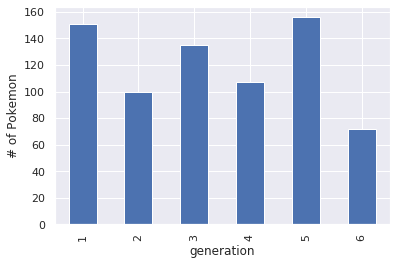

In [168]:
df_aux = pokedex.groupby(['generation'])['id'].count()
ax = df_aux.plot(kind='bar')
ax.set_ylabel('# of Pokemon')

### Try Seaboarn:

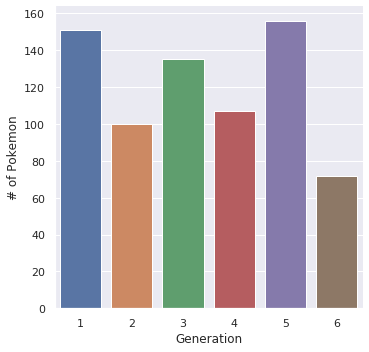

In [169]:
sns.catplot(kind='count', data=pokedex, x='generation').set_axis_labels("Generation", "# of Pokemon")

#### There doesn't seem to be a trend across generations; however, even-numbered generations introduced fewer Pokemon as compared to the odd-numbered generations.

#### Let's dig a bit deeper and examine the distribution of primary types of Pokemon across generations.

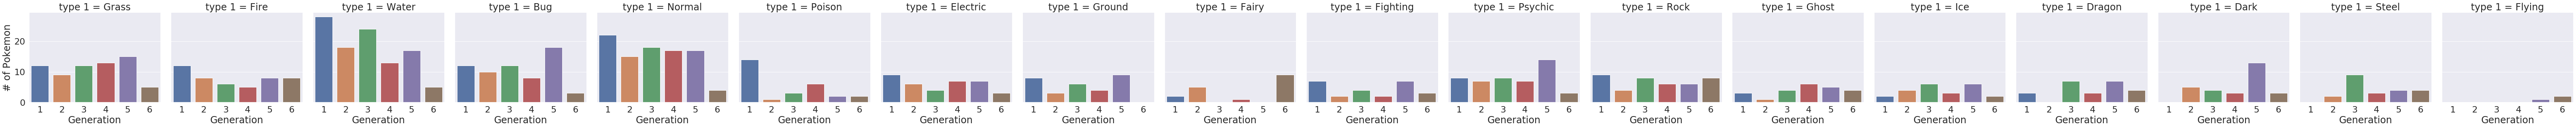

In [170]:
sns.set(font_scale=2)
sns.catplot(
  kind='count', data=pokedex, col='type 1',
  x='generation').set_axis_labels("Generation", "# of Pokemon")

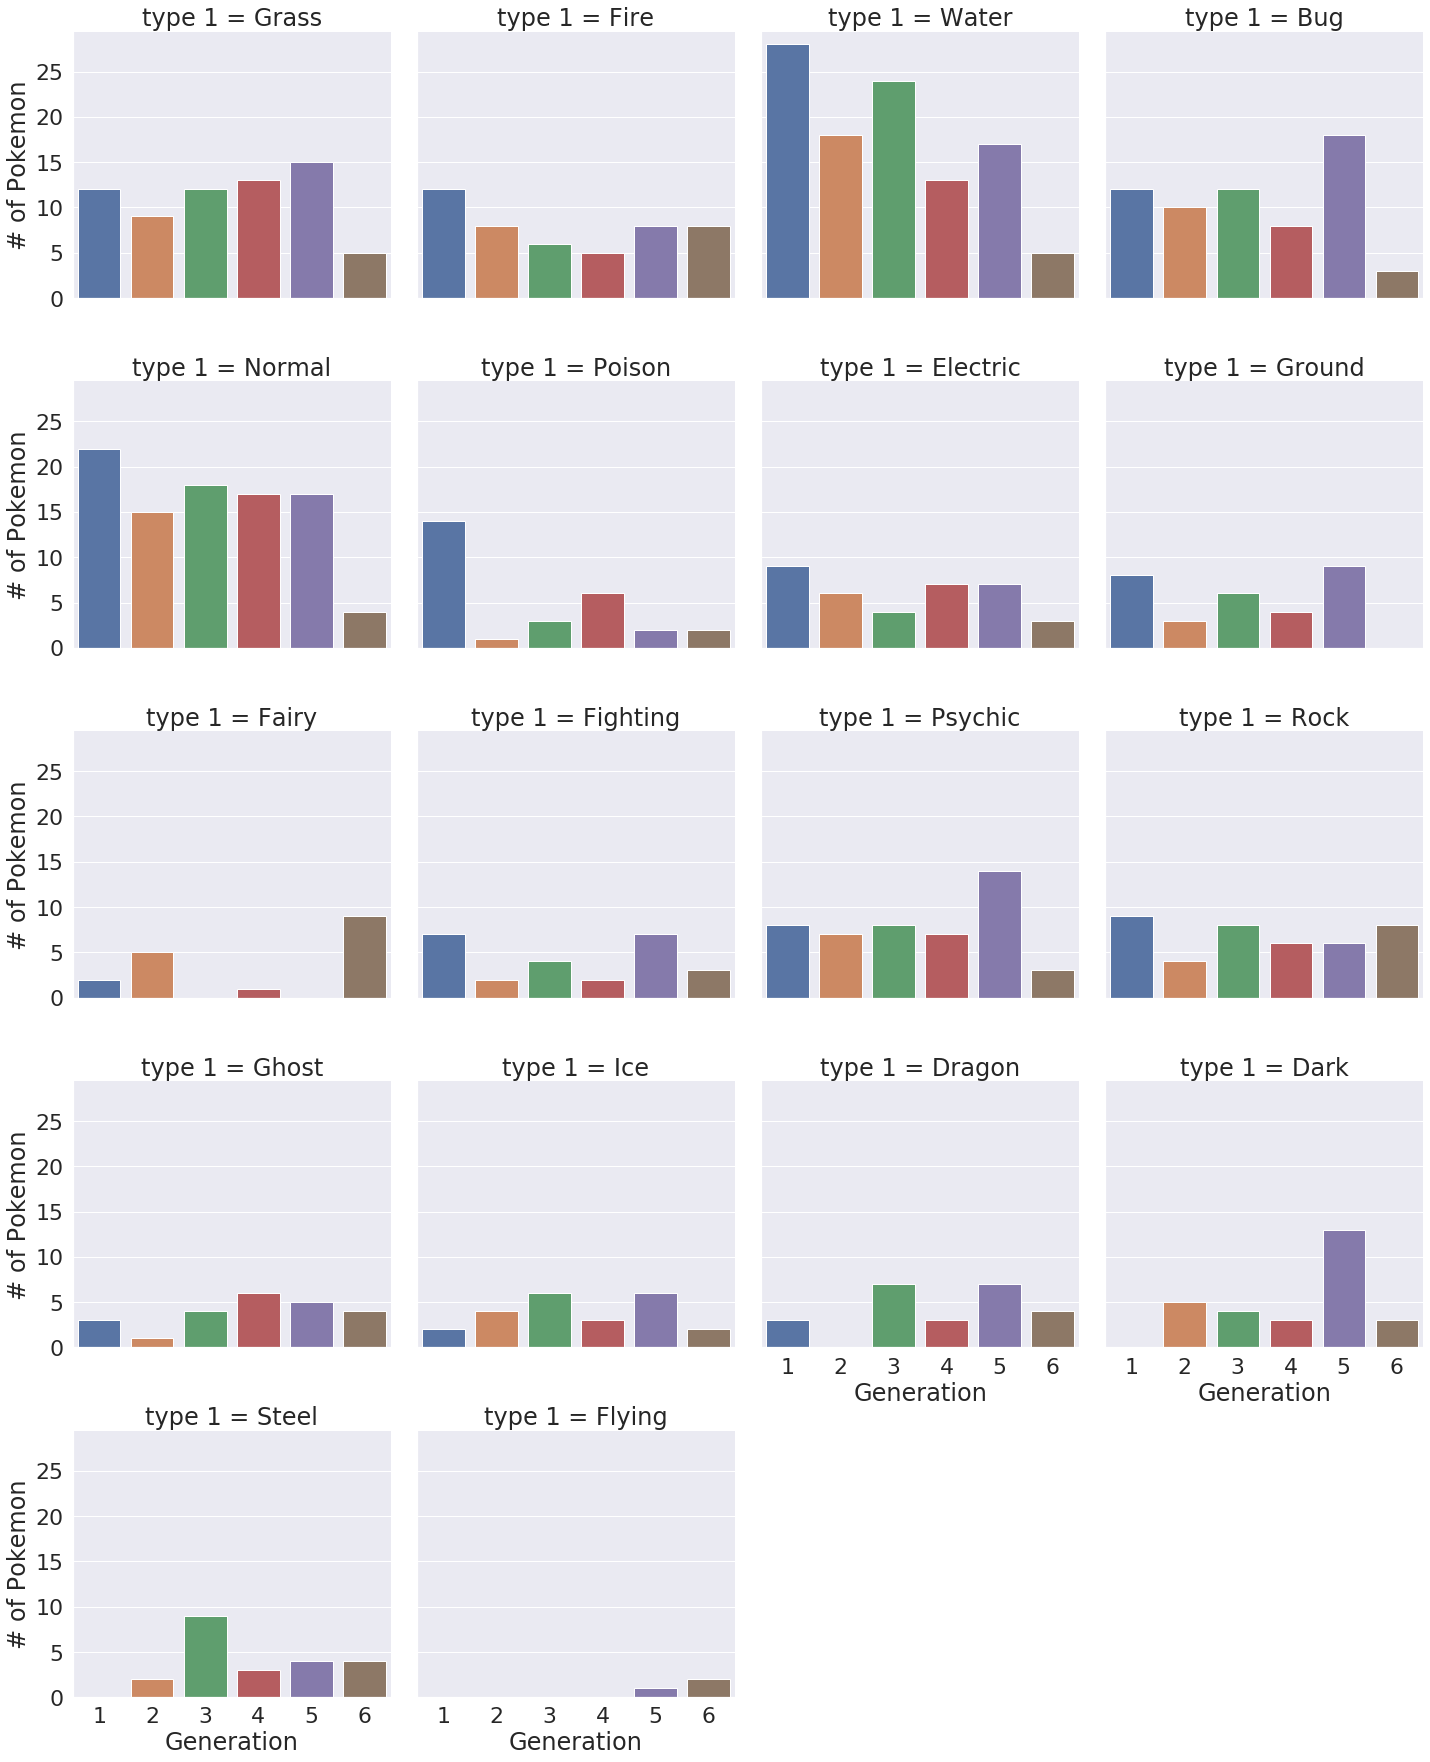

In [171]:
sns.set(font_scale=2)
sns.catplot(
  kind='count', data=pokedex, col='type 1', col_wrap=4,
  x='generation').set_axis_labels("Generation", "# of Pokemon")

### Conclusions (tpye/gen)

+ General Trends:
  + The number of pokemons with primary type Water tends to decline as the generations progress (take into account the relative numbers of pokemons in each generation).
  + With a few exception (viz Poison, Steel, Fairy and Flying), the relative number of pokemons with each primary type is relatively stable across generations.

+ Themes:
  + Gen 1:
    + This exhibits a disproportionate number of Poison pokemons.
    + A few types had not yet been introduced: Dark, Steel, Flying.
    + The most common primary types are Water and Normal.
  + Gen 2:
    + No Dragons
    + Lowest number of primary type Poison (only 1).
  + Gen 3:
    + This exhibits a disproportionate number of Steel pokemons. Suggests a Steel theme? yes, see below!
  + Gen 4:
    + No comments.
  + Gen 5:
    + This exhibits a disproportionate number of Bug and Psychic pokemons.
    + Introduces Flying as a primary type. Surely one legendary pokemon is flying (see below).
  + Gen 6:
    + Has the lowest number of pokemons. Yet the Fairy primary type is much higher than in any other gen, indicating a fairy theme (see below).
    + The primary types Bug, Normal, Ground and Psychic are under-represented.


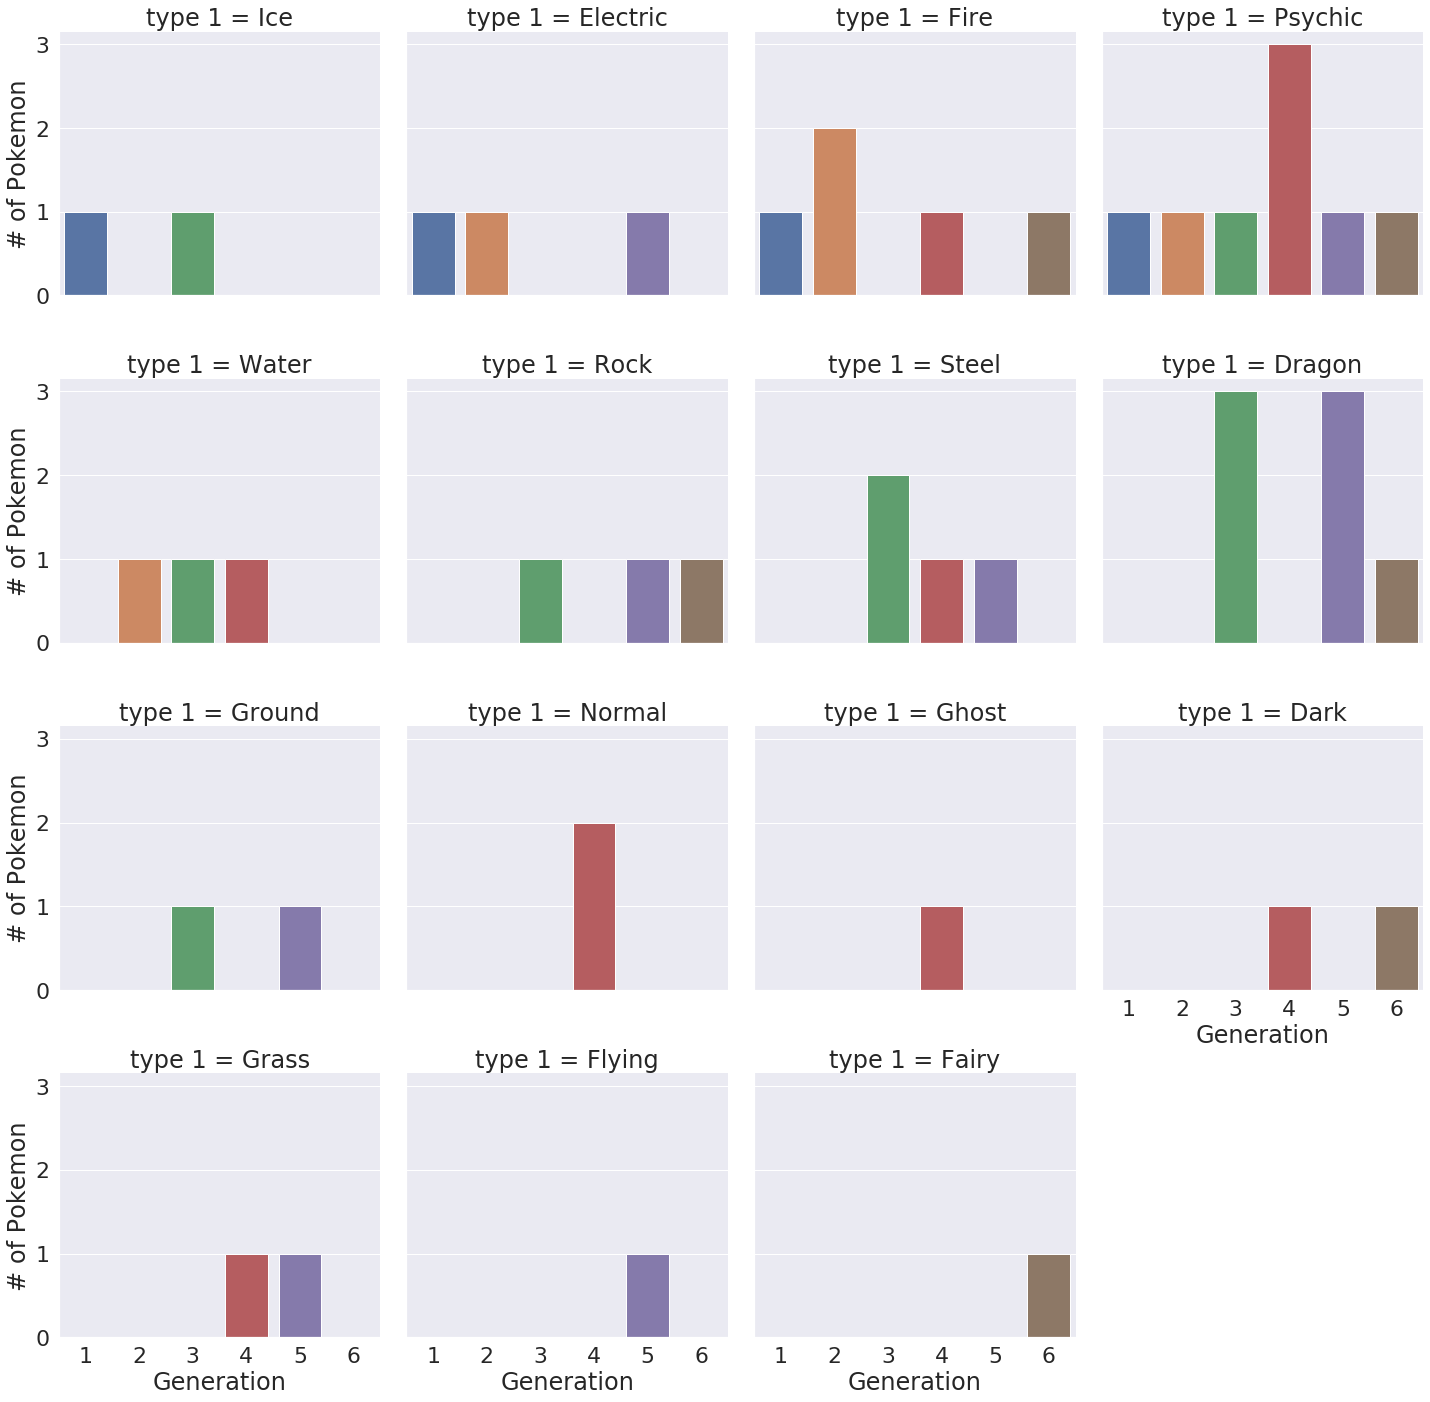

In [172]:
sns.set(font_scale=2)
sns.catplot(
  kind='count', data=pokedex[pokedex['legendary'] == True], col='type 1',
  col_wrap=4, x='generation').set_axis_labels("Generation", "# of Pokemon")


### Are there unique primary or secondary Pokemon types, or if they simply share the same ones.

In [173]:
#help(np.setdiff1d)
#np.setdiff1d(pokedex['type 1'], ['magenta', 'Steel'])
unique_type1 = np.setdiff1d(pokedex['type 1'], pokedex['type 2'])
unique_type1

array([], dtype=object)

In [174]:
unique_type2 =  np.setdiff1d(pokedex['type 2'], pokedex['type 1'])
unique_type2
### There are no unique primary or secondary types

array(['None'], dtype=object)

In [175]:
# Get The total number of primary and secondary types:
print('# of Type1 Pokemon: {}'.format(len(np.unique(pokedex['type 1']))))
print('# of Type2 Pokemon: {}'.format(len(np.unique(pokedex['type 2']))))

# of Type1 Pokemon: 18
# of Type2 Pokemon: 19


### What are the most common types of Pokemon?

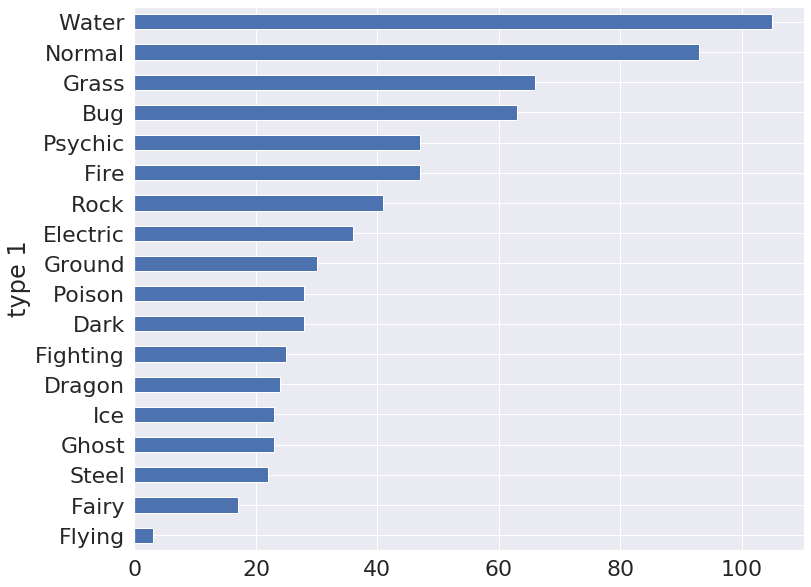

In [176]:
# Make a plot of the distribution of the Type 1 Pokemon. 
aux = pokedex.groupby(['type 1'])['type 1'].count().sort_values()
aux.plot(kind='barh', figsize=(12, 10))

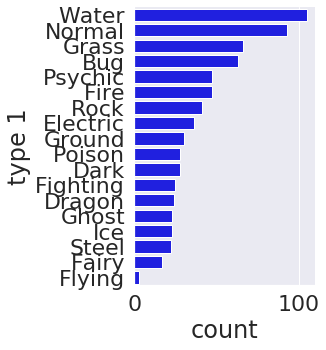

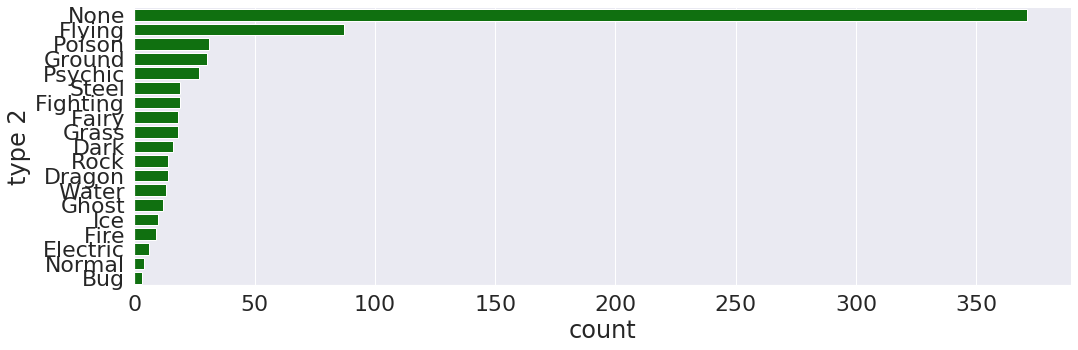

In [177]:
# Now try Seaborn:
sns.catplot(
  data=pokedex, y='type 1', kind='count',
  order = pokedex['type 1'].value_counts().index,
  color='blue', aspect=1)

sns.catplot(
  data=pokedex, y='type 2', kind='count',
  order = pokedex['type 2'].value_counts().index,
  color='green', aspect=3.1)

### Conclusions (type 1 and type 2)

+ There are no types that are restricted to being either primary only or secondary only. However, some types are much more frequent as type 1 or type 2.
  + Types that are most frequent as secondary and are rarely primary: Flying
  + Types that are most frequent as primary and are rarely secondary: Water, Normal and Bug.
  + Types that are common both as primary and secondary: Grass and Psychic.
  + Rare types: Ice, Ghost and Dragon.
+ There are more pokemons with a single type than with two types (371 vs 350).

### But we can not say which type maps into which type !

Lets create a heatmap !

In [178]:
# Create a new df called "dual_types" by getting rid of the records for which we do not have Type 2
dual_types = pokedex[pokedex['type 2'] != 'None']
dual_types

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
6,6,Charizard,Fire,Flying,1,False
15,12,Butterfree,Bug,Flying,1,False
16,13,Weedle,Bug,Poison,1,False
17,14,Kakuna,Bug,Poison,1,False
18,15,Beedrill,Bug,Poison,1,False
20,16,Pidgey,Normal,Flying,1,False
21,17,Pidgeotto,Normal,Flying,1,False


In [179]:
# Get a grid of values from 'type 1' 'type 2'  (Hint: use groupby, size, unstack, values 
#and any other attributes you may need !)
type_2D = dual_types.groupby(['type 1', 'type 2']).size().unstack()
type_2D.shape

(18, 18)

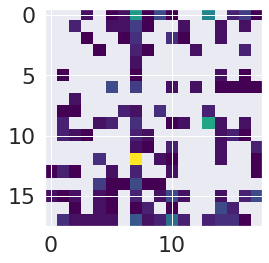

In [180]:
# Try matplotlib imshow as a way to get a heatmap, something like this:
plt.imshow(type_2D, cmap='viridis')

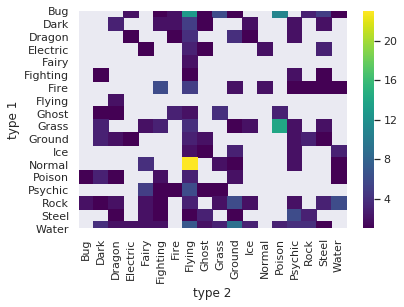

In [181]:
sns.set(font_scale=1)
sns.heatmap(type_2D, cmap='viridis') 

(18.0, 0.0)

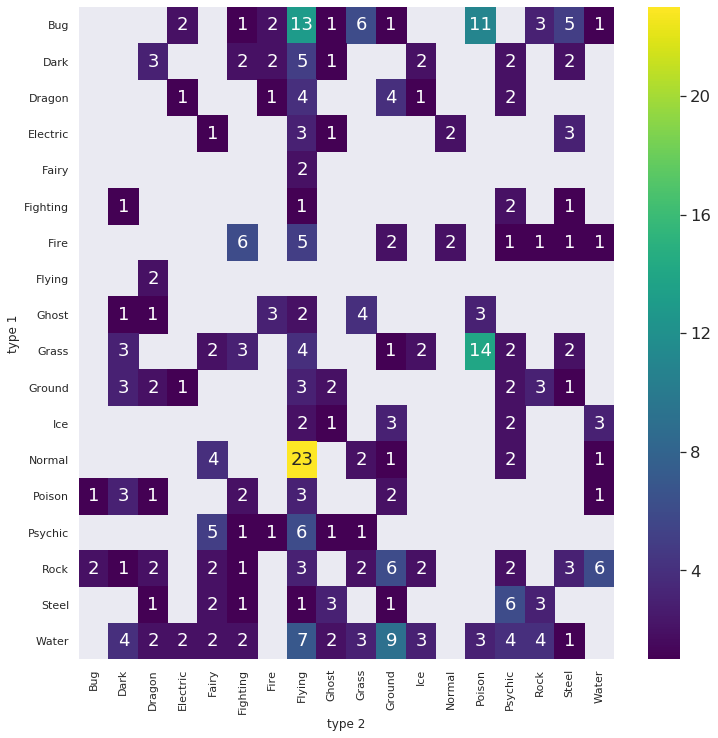

In [182]:
fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.5)
sns.heatmap(type_2D, cmap='viridis', annot=True, ax=ax)

#Fix first and last rows. (Bug in recent matplotlib)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Conclusions from the heatmap

+ Traits that stand out (does not include pokemons with a single type):
  + The large number of pokemos with Normal primary type and Flying secondary type.
  + Pokemos that have primary type as Flying all have Dragon as secondary trait.
  + Most of the pokemons which have Grass as a primary type have Psychic as secondary type.
  + Pokemons with Bug as primary type typically exhibit Flying or Poison as secondary traits.
  + All pokemons that have Fairy as primary types have Flying as secondary type.
  + Pokemons with secondary type Flying can have any type 1.
  + Flying is the most restrictive primary type and least restrictive secondary trait.

### Are any of the statistics correlated?

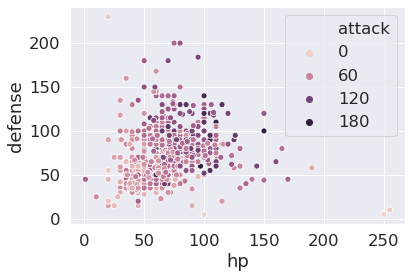

In [183]:
# plot differernt combinations of quantities and see if you can see any correlation.

#poke_statistics.columns
sns.scatterplot(x='hp', y='defense', hue='attack', data=poke_statistics)

In [184]:
# It seems hard to see the correlation based on the scatter plots.
x = poke_statistics.hp
y = poke_statistics.defense
coeff, p = stats.pearsonr(x, y)
print('Person coefficient between hp and defense is {}'.format(coeff))
print('p value is {}'.format(p))

Person coefficient between hp and defense is 0.23417725028263234
p value is 1.9426273224355822e-10


In [185]:
# Loop over all combinations and output the correlation coefficients. Then sort based on the coefficients
out = {}
cols = ['hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed']

#Loop over relevant column combinations only.
for i, c1 in enumerate(cols):
    try:
        for c2 in cols[i+1:]:
            key = c1 + '_' + c2
            coeff, p = stats.pearsonr(poke_statistics[c1], poke_statistics[c2])
            out[key] = p
    except:
        pass

out_sorted = sorted(out.items(), key=operator.itemgetter(1))
for val in out_sorted:
    print(val)

('sp. atk_sp. def', 1.976292699948766e-45)
('defense_sp. def', 8.021535723777772e-43)
('sp. atk_speed', 2.040750190413875e-35)
('attack_defense', 1.7645656275399863e-34)
('hp_attack', 4.0036406508803155e-33)
('hp_sp. def', 1.5162086977423246e-26)
('hp_sp. atk', 7.888099966768526e-24)
('attack_sp. atk', 6.224691357377719e-21)
('attack_speed', 4.939662406627616e-20)
('sp. def_speed', 1.2695250106158274e-10)
('hp_defense', 1.9426273224355822e-10)
('attack_sp. def', 1.6412328202617918e-08)
('defense_sp. atk', 4.343488725007803e-08)
('hp_speed', 4.4087139824406095e-06)
('defense_speed', 0.8543315721707131)


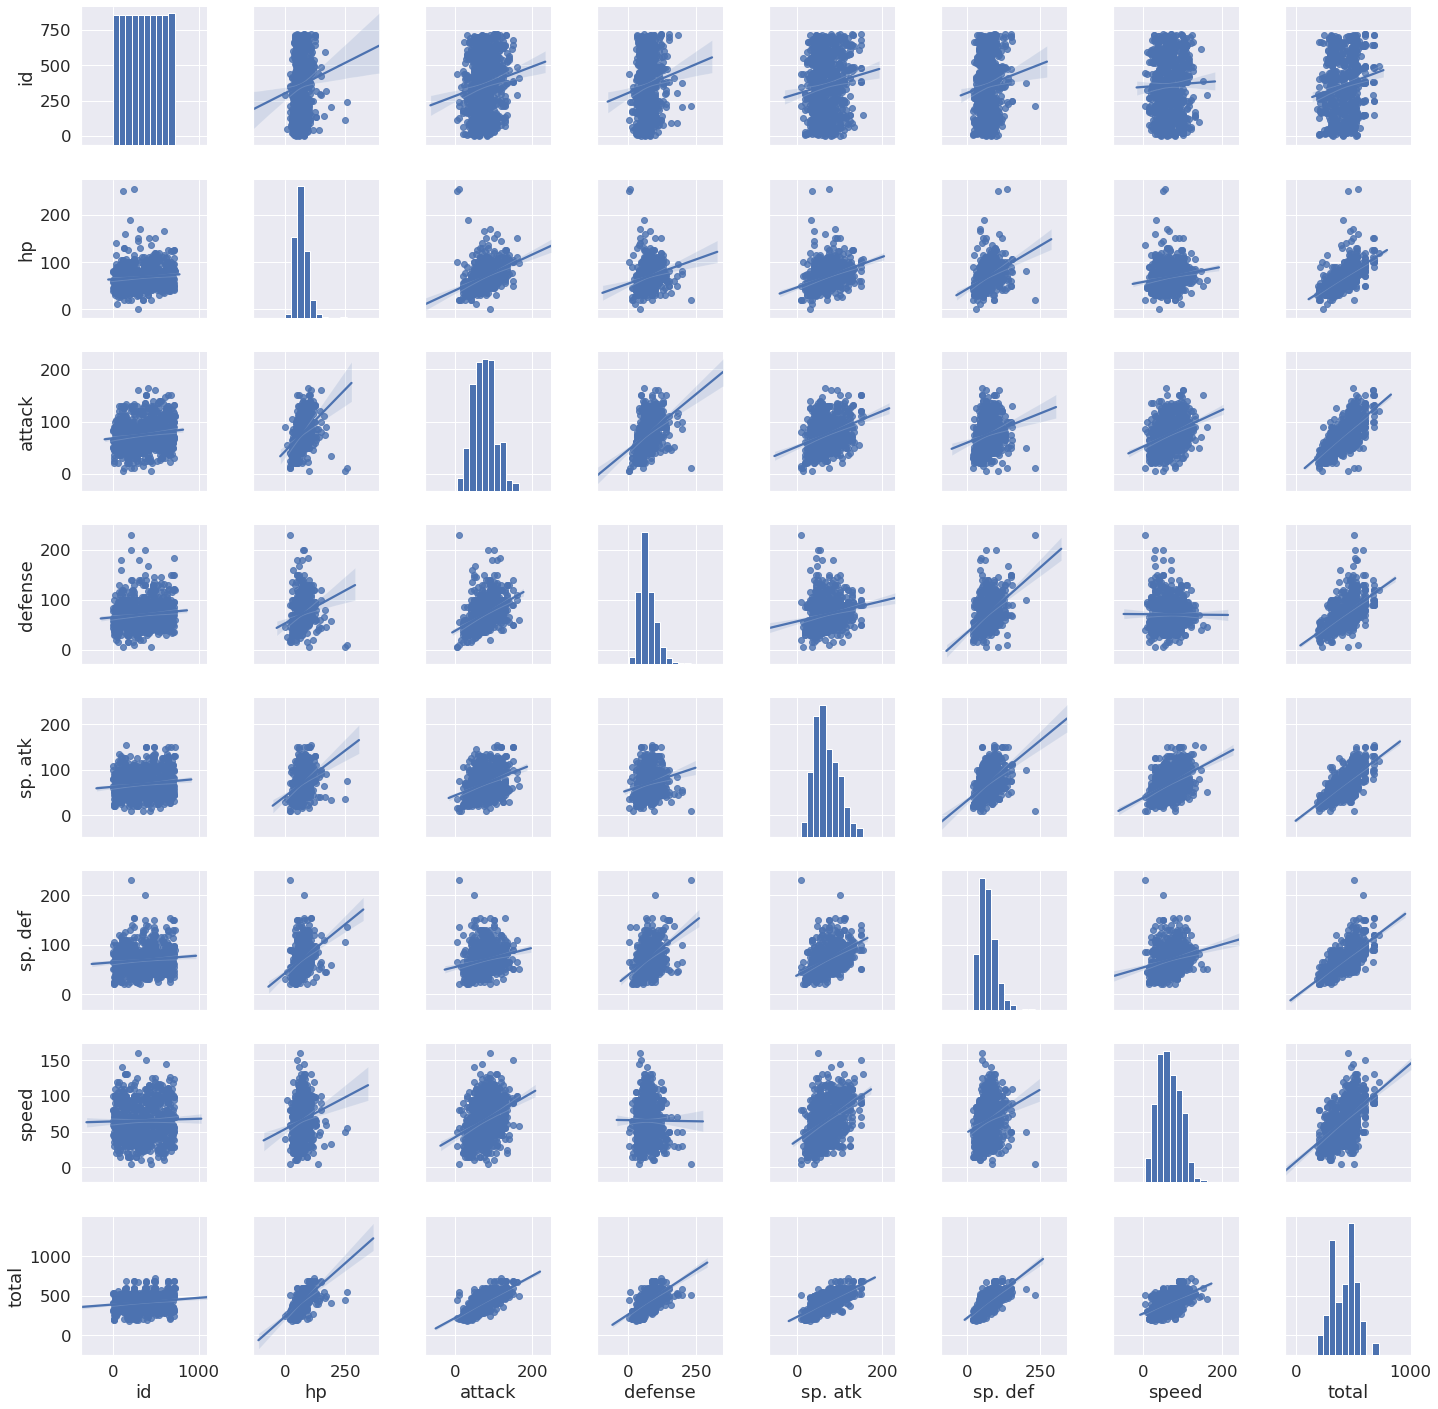

In [186]:
sns.pairplot(poke_statistics, kind='reg')

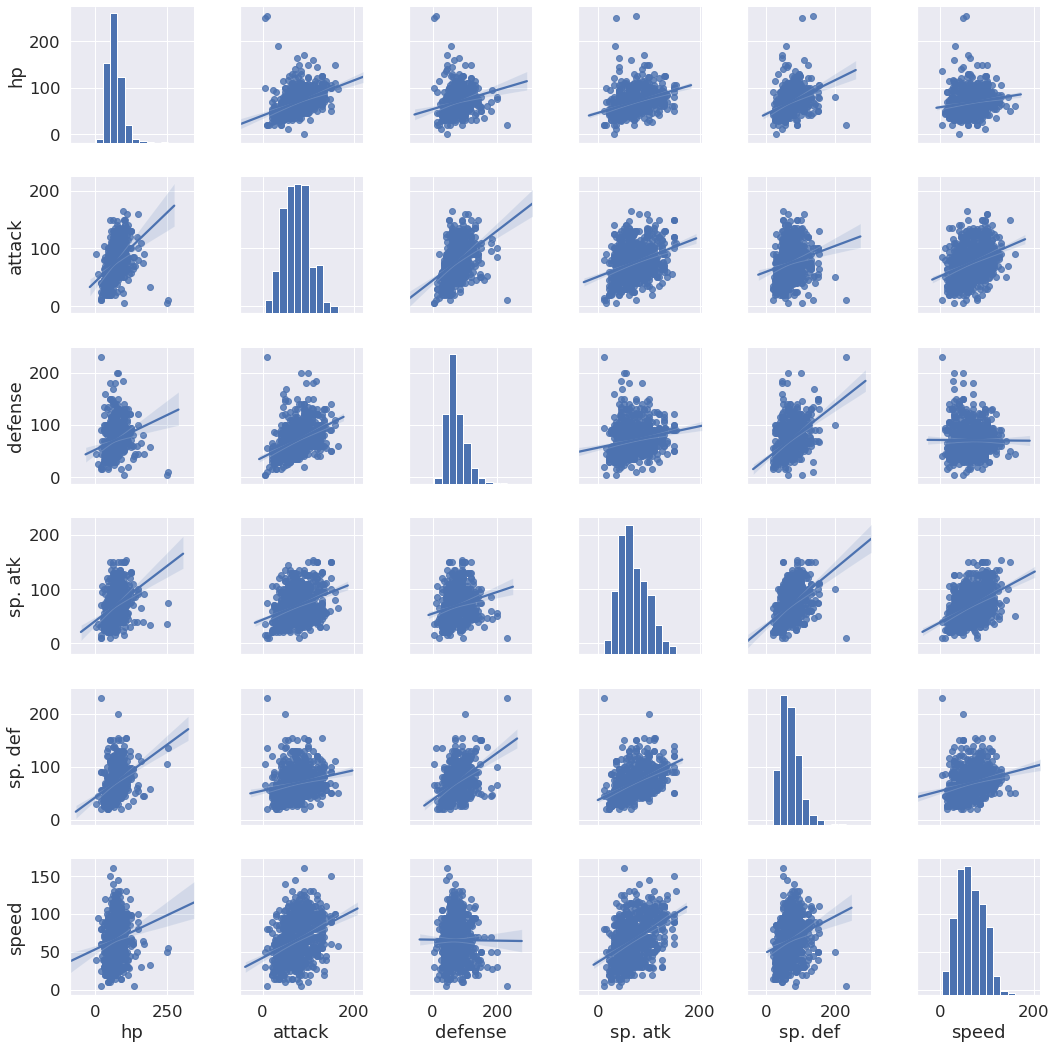

In [187]:
cols = ['hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed']
aux = poke_statistics[cols]
sns.pairplot(aux, kind='reg')

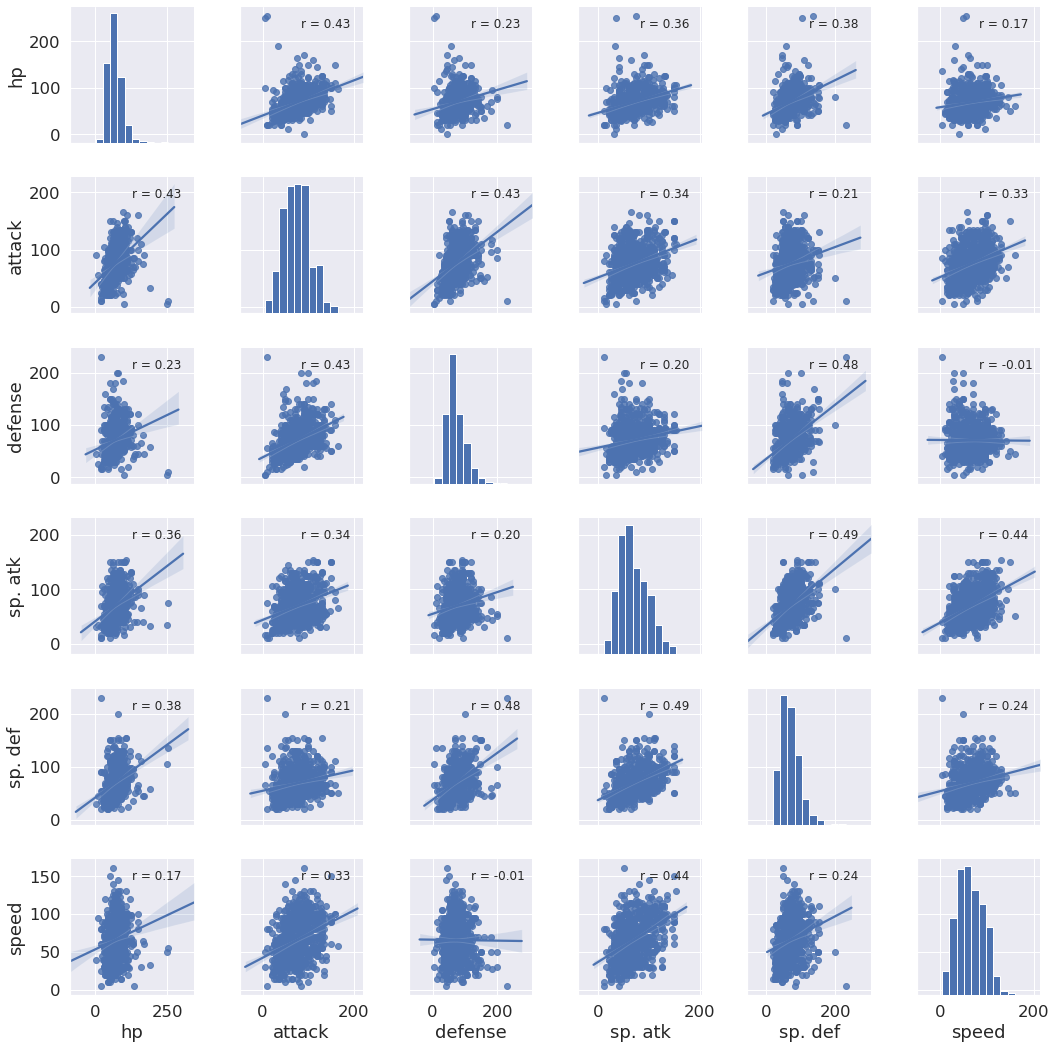

In [188]:
cols = ['hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed']
aux = poke_statistics[cols]

#Calculate person stats for each plot.
coeffs = [format(stats.pearsonr(poke_statistics[c1], poke_statistics[c2])[0], '.2f')
          for (c1,c2) in list(itertools.product(cols,cols))]

g = sns.pairplot(aux, kind='reg')

for i, ax in enumerate(g.axes.flat):
    if i % 7 != 0:
        ax.text(0.5, 0.85,'r = {}'.format(coeffs[i]), fontsize=12, transform=ax.transAxes)

### Conclusions (pairplot)

+ Correlations between attributes are mild or inexistent.
  + Highest correlations are between sp. atk and sp. def (r = 0.49) and sp. def and defense (r=0.48).
  + The weakest correlation is between speed and defense, with r=-0.01.
+ Interestingly, the distribution of pokemons within each attribute is not universal, meaning that they are not all, for example, gaussian.
  + Furthermore, the high-end tail tends to be "slimmer" than the low end tail, indicating that it is more difficult to find a pokemon that excels in a given attribute than it is to find an extremely weak pokemon in that same attribute.
+ outliers.
  + Most panels in the corner plots exhibit one or two outliers in that parameter space.

### What are the strongest and weakest Pokemon species?

In [189]:
# Do your calculations here :

cols = ['hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed']
aux = poke_statistics[cols]

#Create a new column for each attribute containing the zscores.
df['strength'] = np.zeros(df.shape[0])
for col in cols:
    z_scores = stats.zscore(df[col])
    df[col + '_zscore'] = z_scores
    df['strength'] += z_scores

### Why total is not a good metric

+ The range of values for each attribute is not necessarily standard. Hence, if one attribute tends to exhibit large numbers (say 200 to 250) while the others exhibit ranges of (say 150 to 200), then the total will be biased toward the former attribute. This means that the attributes are not readily comparable.
+ Outliers in a given attribute may also bias the total stat.

In [190]:
# Instead, try a different metric: standardize the six statistic columns independently by converting each 
# value into a z-score so when we do take the sum, we account for the variation in the each statistic using 
# its mean and standard deviation across all Pokemon species.

df.sort_values(by=['strength'], ascending=False).head(n=20)

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,strength,hp_zscore,attack_zscore,defense_zscore,sp. atk_zscore,sp. def_zscore,speed_zscore
552,493,Arceus,Normal,None,720,120,120,120,120,120,120,4,True,10.886368,1.998424,1.544747,1.689902,1.771252,1.890564,1.991479
544,487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True,9.566219,3.159849,0.856283,1.689902,1.078696,1.890564,0.890925
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True,9.513600,1.456426,0.512051,2.032665,0.732419,3.155412,1.624627
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,9.478329,1.456426,1.888980,0.661613,1.424974,3.155412,0.890925
792,716,Xerneas,Fairy,None,680,126,131,95,131,98,99,6,True,9.432488,2.230709,1.923403,0.832995,2.152158,1.072133,1.221091
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,9.432488,2.230709,1.923403,0.832995,2.152158,1.072133,1.221091
162,150,Mewtwo,Psychic,None,680,106,110,90,154,90,130,1,True,9.400003,1.456426,1.200515,0.661613,2.948597,0.774522,2.358330
706,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True,9.364839,1.224141,1.544747,1.004376,2.810086,1.890564,0.890925
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True,9.344549,0.836999,1.544747,1.004376,2.810086,1.890564,1.257776
425,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True,9.315726,1.417712,2.577444,0.661613,2.810086,0.774522,1.074350


Text(0, 0.5, 'mean strength')

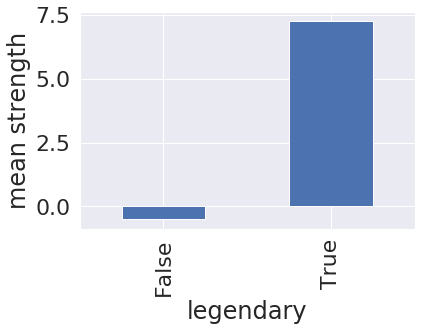

In [191]:
#Extra:
#The table above strongly suggests that legendary pokemons are, in fact, exceptional.
#Show this quantitatively.
sns.set(font_scale=2.)
ax = df.groupby('legendary')['strength'].mean().plot(kind='bar')
ax.set_ylabel('mean strength')

(18.0, 0.0)

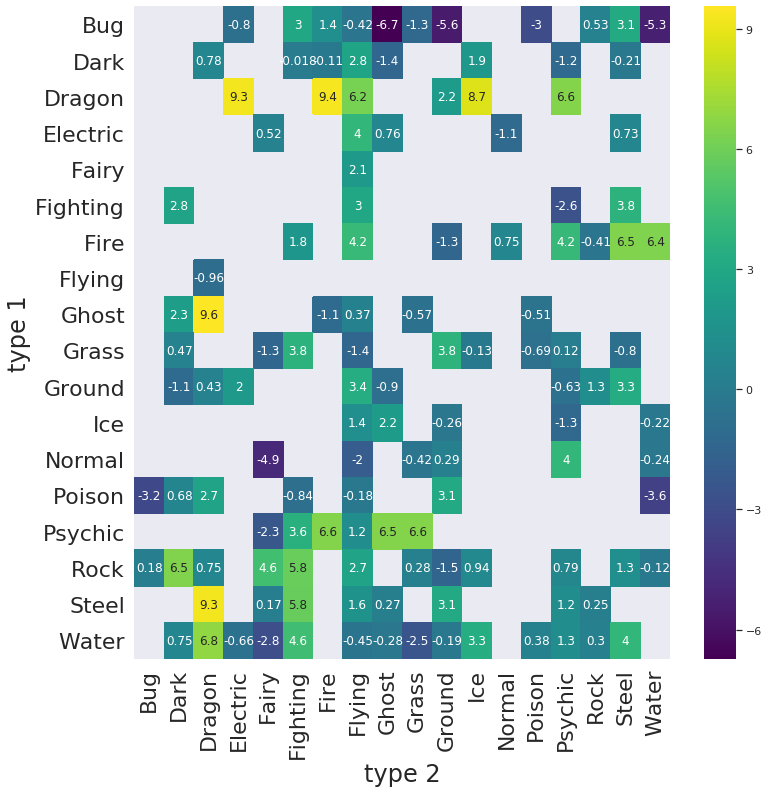

In [192]:
# Repeat the heatmap you created but now for the new strength metric you computed

dual_types = df[df['type 2'] != 'None']
type_2D = dual_types.groupby(['type 1', 'type 2'])['strength'].mean().unstack()

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.)
sns.heatmap(type_2D, cmap='viridis', annot=True, ax=ax)

#Fix first and last rows. (Bug in recent matplotlib)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Conclusions (strength of types)

+ Dragon is the strongest type, while Bug is the weakest.
+ Psychic is relative strong as a primary type, but relatively weak as secondary.
+ Flying is above average.
+ The combinations (Fire/Steel), (Fire/Water), (Psychic/Ghost), (Psychic/Grass), (Rock/Dark), (Rock/Fightning) and (Fighting/Steel) are very powerful. 

### Do any types of Pokemon excel at certain statistics over others?

(18.0, 0.0)

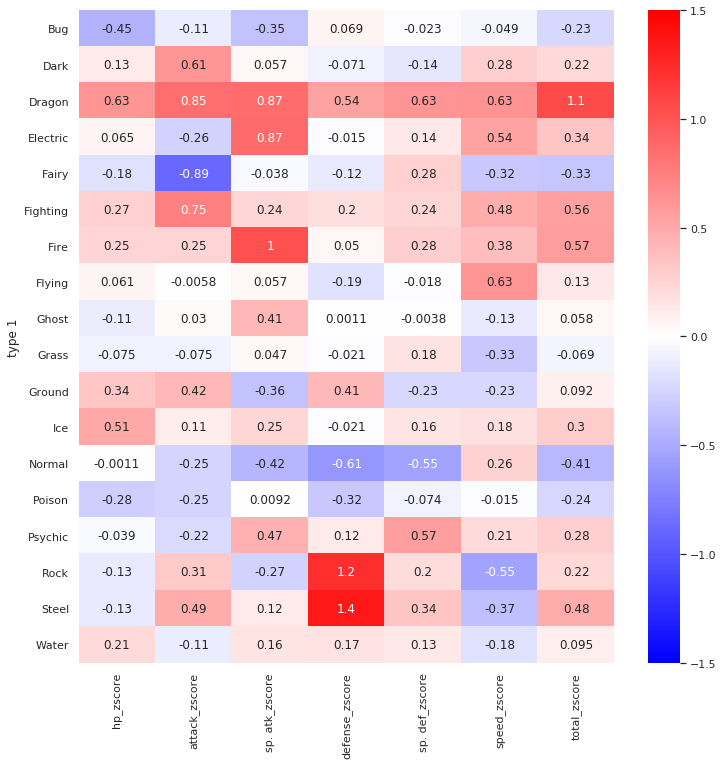

In [193]:
# Do your calculations here. Create a heat map to show this at the end.
#By type, let's aggregate both type 1 and type 2. This analysis could
#have also been done with type 1 alone.

#For study purposes, let's also calculate a column of total_zscore.
#Create a new column for each attribute containing the zscores.
df['total_zscore'] = stats.zscore(df['total'])

df_clean = df[df['type 2'] != 'None']


cols = ['hp_zscore', 'attack_zscore', 'sp. atk_zscore', 'defense_zscore',
        'sp. def_zscore', 'speed_zscore', 'total_zscore']

aux_sum = df_clean.groupby('type 1')[cols].sum()\
          + df_clean.groupby('type 2')[cols].sum()
aux_count = df_clean.groupby('type 1')[cols].count()\
            + df_clean.groupby('type 2')[cols].count()
aux_mean = aux_sum / aux_count

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.)
sns.heatmap(aux_mean, cmap='bwr', annot=True, ax=ax, vmin=-1.5, vmax=1.5)

#aux = df_clean.groupby('type 1')[cols].mean()
#sns.heatmap(aux, cmap='Spectral', annot=True, ax=ax, vmin=-1.5, vmax=1.5)

#Fix first and last rows. (Bug in recent matplotlib)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


### Conclusions (excellence of types)

+ Dragons are relatively strong in all attributes.
+ Fighting, Fire are types with above average attributes.
+ Normal exhibits nearly all attributes below average.
+ Rock and Stell excel in defense.
+ Fire excels in sp. atk.
+ Ground is the most balanced type, with clear strengths and weakness.

### Are any of the statistics correlated?

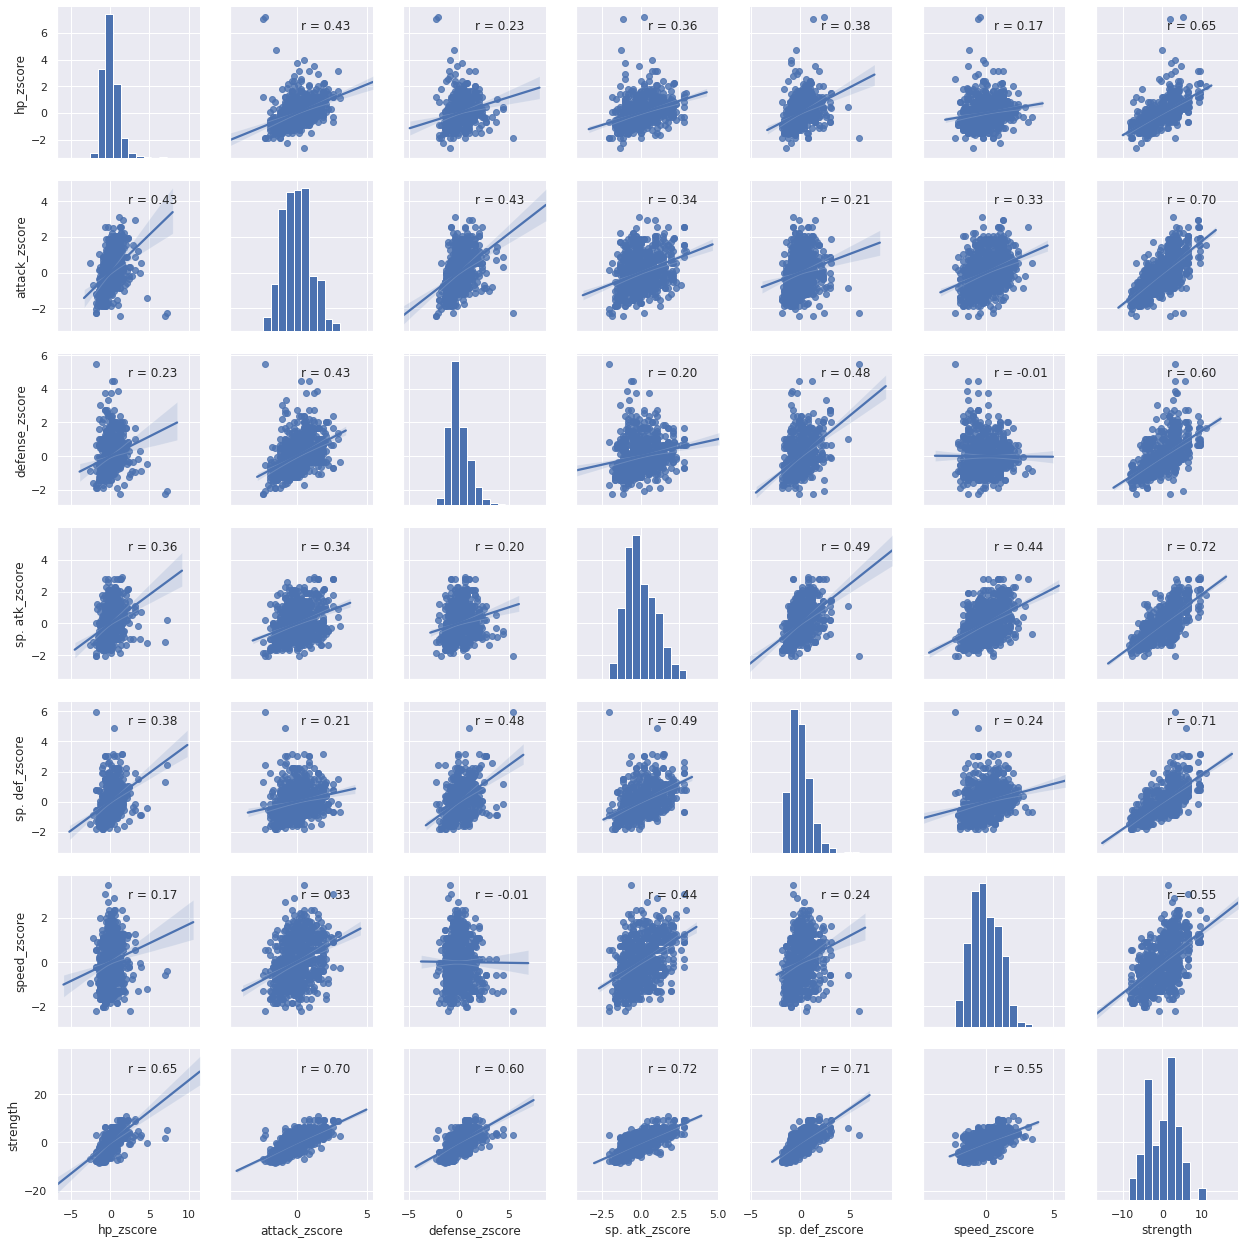

In [194]:
# Do your calculations here. Create a set of correlation plots as you did before to show this at the end.

cols = ['hp_zscore', 'attack_zscore', 'defense_zscore', 'sp. atk_zscore',
        'sp. def_zscore', 'speed_zscore', 'strength']
aux = df[cols]

#Calculate person stats for each plot.
coeffs = [format(stats.pearsonr(aux[c1], aux[c2])[0], '.2f')
          for (c1,c2) in list(itertools.product(cols,cols))]

g = sns.pairplot(aux, kind='reg')

for i, ax in enumerate(g.axes.flat):
    if i % 8 != 0:
        ax.text(0.5, 0.85,'r = {}'.format(coeffs[i]), fontsize=12, transform=ax.transAxes)


### Conclusions (correlation between attributes)

+ Correlation betweens the z-scores is much stronger than between the raw attributes (max r was 0.49 before).
  + This suggests that there are some pokemons that strong and some that are weak, rather than each having a balance between weaknesses and strengths. In part, this makes sense since and evolved pokemon should be overall stronger than its less evolved counterpart.
  + Strength exhibit as discontinued high tail. This is interesting, as it implies that legendaries pokemons are in a league of their own.
  + As expected, Strength correlates (r > 0.5) with virtually all attributes. Especially sp. Atk, sp. defense and attack (r=0.72,0.71, 0.70, respectively).
  + speed and defense remain the least correlated attributes.